In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
nb_classes = 10
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
tf.reset_default_graph()

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.get_variable("W1", shape=[784, 392],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([392]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[392, 392],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([392]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[392, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [14]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Training
for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += cost_val / num_iterations
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished')

Epoch: 0001 cost = 0.279559917
Epoch: 0002 cost = 0.102466174
Epoch: 0003 cost = 0.064555062
Epoch: 0004 cost = 0.044983712
Epoch: 0005 cost = 0.031848409
Epoch: 0006 cost = 0.027033243
Epoch: 0007 cost = 0.021393424
Epoch: 0008 cost = 0.015989656
Epoch: 0009 cost = 0.016949181
Epoch: 0010 cost = 0.013322478
Epoch: 0011 cost = 0.011728490
Epoch: 0012 cost = 0.011204075
Epoch: 0013 cost = 0.009883816
Epoch: 0014 cost = 0.011102427
Epoch: 0015 cost = 0.008209764
Learning Finished


Accuracy: 0.9771
Label:  [7]
Prediction:  [7]


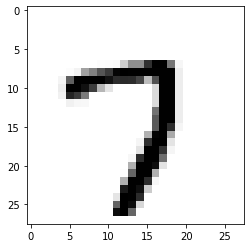

In [15]:
# Testing and Accuracy
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) # test model prediction
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # calculate accuracy
print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
    "Prediction: ",
    sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()